# Loading/Formating/Minor Cleaning

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [43]:
df = pd.read_csv('2022-2023.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   55 non-null     object
 1   First        51 non-null     object
 2   Unnamed: 2   53 non-null     object
 3   Unnamed: 3   51 non-null     object
 4   Unnamed: 4   47 non-null     object
 5   Unnamed: 5   47 non-null     object
 6   Unnamed: 6   9 non-null      object
 7   Unnamed: 7   9 non-null      object
 8   Unnamed: 8   9 non-null      object
 9   Second       47 non-null     object
 10  Unnamed: 10  51 non-null     object
 11  Unnamed: 11  53 non-null     object
 12  Unnamed: 12  53 non-null     object
 13  Unnamed: 13  47 non-null     object
 14  Unnamed: 14  47 non-null     object
 15  Unnamed: 15  42 non-null     object
 16  Unnamed: 16  47 non-null     object
 17  Third        42 non-null     object
 18  Unnamed: 18  53 non-null     object
 19  Unnamed: 19  55 non-null     ob

In [44]:
df2024 = pd.read_csv('2024-2025.csv')
df2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   2024-2025      62 non-null     object
 1   First 8 Week   62 non-null     object
 2   Unnamed: 2     54 non-null     object
 3   Unnamed: 3     54 non-null     object
 4   Unnamed: 4     54 non-null     object
 5   Unnamed: 5     54 non-null     object
 6   Unnamed: 6     54 non-null     object
 7   Unnamed: 7     54 non-null     object
 8   Unnamed: 8     50 non-null     object
 9   Second 8 Week  59 non-null     object
 10  Unnamed: 10    54 non-null     object
 11  Unnamed: 11    54 non-null     object
 12  Unnamed: 12    54 non-null     object
 13  Unnamed: 13    51 non-null     object
 14  Unnamed: 14    54 non-null     object
 15  Unnamed: 15    54 non-null     object
 16  Unnamed: 16    51 non-null     object
 17  Third 8 Week   62 non-null     object
 18  Unnamed: 18    54 non-null     o

In [45]:
muscles_2022 = ["Chest", "Shoulders", "Triceps", "Upper Back",
                "Traps", "Biceps", "Quads", "Hamstrings", "Calves"]

muscles_2024 = ["Chest", "Shoulder", "Triceps", "Upper Back",
                "Traps", "Bicep", "Quads", "Hamstrings", "Calves"]

In [46]:
df.head()

,Unnamed: 0,First,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Second,...,Unnamed: 31,Unnamed: 32,Fifth,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,Chest,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 1,...,Week 7,Week 8,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8
1,Total Load,0,"8,690","6,085","2,360","7,300",NaN,NaN,NaN,"7,915",...,"10,520","12,434","12,075",0,"15,804","13,600",0,"16,595",NaN,NaN
2,Total Sets,0,15,14,8,13,NaN,NaN,NaN,12,...,19,21,23,0,24,20,0,27,NaN,NaN
3,Total Reps,0,141,136,88,129,NaN,NaN,NaN,125,...,235,237,259,0,264,255,0,373,NaN,NaN
4,Weights Per Rep,NaN,62,45,27,57,NaN,NaN,NaN,63,...,45,52,47,NaN,60,53,NaN,44,NaN,NaN


In [47]:
df2024.head()

,2024-2025,First 8 Week,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Second 8 Week,...,Unnamed: 43,Unnamed: 44,Sevnth 8 Week,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
0,Chest,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 1,...,Week 7,Week 8,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8
1,Total Load,"5,030","6,171","6,856","7,872","8,540","8,619","9,502","9,660",0,...,"15,139","16,178","15,494","11,876","14,274","11,819","13,075","10,840","15,430","13,962"
2,Total Sets,9,11,10,10,12,13,12,13,0,...,14,15,15,15,14,14,14,14,14,15
3,Total Reps,90,95,98,92,90,89,94,92,0,...,112,115,109,107,93,101,87,102,119,110
4,Weights Per Rep,56,65,70,86,95,97,101,105,0,...,135,141,142,111,153,117,150,106,130,127


In [48]:
def auto_rename_weeks(df):
    cols = df.columns.tolist()
    new_cols = [cols[0]]
    group_num = 1
    week_num = 1
    for col in cols[1:]:
        header_val = str(col).strip()
        if header_val and "Unnamed" not in header_val:
            week_num = 1  # reset week count
            new_name = f"Week {group_num}.{week_num}"
            group_num += 1
        else:
            new_name = f"Week {group_num-1}.{week_num}"
        new_cols.append(new_name)
        week_num += 1
    df.columns = new_cols
    return df
# The 1.1 meaning is 1 is Block 1 and the .1 is the Week. So Block 1|week 1 = 1.1. 1.2 = Block 1|Week 2

In [49]:
df = auto_rename_weeks(df)
df2024 = auto_rename_weeks(df2024)

In [50]:
print(df.columns) #verification of rename

Index(['Unnamed: 0', 'Week 1.1', 'Week 1.2', 'Week 1.3', 'Week 1.4',
       'Week 1.5', 'Week 1.6', 'Week 1.7', 'Week 1.8', 'Week 2.1', 'Week 2.2',
       'Week 2.3', 'Week 2.4', 'Week 2.5', 'Week 2.6', 'Week 2.7', 'Week 2.8',
       'Week 3.1', 'Week 3.2', 'Week 3.3', 'Week 3.4', 'Week 3.5', 'Week 3.6',
       'Week 3.7', 'Week 3.8', 'Week 4.1', 'Week 4.2', 'Week 4.3', 'Week 4.4',
       'Week 4.5', 'Week 4.6', 'Week 4.7', 'Week 4.8', 'Week 5.1', 'Week 5.2',
       'Week 5.3', 'Week 5.4', 'Week 5.5', 'Week 5.6', 'Week 5.7', 'Week 5.8'],
      dtype='object')


In [51]:
print(df2024.columns) #verification of rename

Index(['2024-2025', 'Week 1.1', 'Week 1.2', 'Week 1.3', 'Week 1.4', 'Week 1.5',
       'Week 1.6', 'Week 1.7', 'Week 1.8', 'Week 2.1', 'Week 2.2', 'Week 2.3',
       'Week 2.4', 'Week 2.5', 'Week 2.6', 'Week 2.7', 'Week 2.8', 'Week 3.1',
       'Week 3.2', 'Week 3.3', 'Week 3.4', 'Week 3.5', 'Week 3.6', 'Week 3.7',
       'Week 3.8', 'Week 4.1', 'Week 4.2', 'Week 4.3', 'Week 4.4', 'Week 4.5',
       'Week 4.6', 'Week 4.7', 'Week 4.8', 'Week 5.1', 'Week 5.2', 'Week 5.3',
       'Week 5.4', 'Week 6.1', 'Week 6.2', 'Week 6.3', 'Week 6.4', 'Week 6.5',
       'Week 6.6', 'Week 6.7', 'Week 6.8', 'Week 7.1', 'Week 7.2', 'Week 7.3',
       'Week 7.4', 'Week 7.5', 'Week 7.6', 'Week 7.7', 'Week 7.8'],
      dtype='object')


In [52]:
df.describe()

,Unnamed: 0,Week 1.1,Week 1.2,Week 1.3,Week 1.4,Week 1.5,Week 1.6,Week 1.7,Week 1.8,Week 2.1,...,Week 4.7,Week 4.8,Week 5.1,Week 5.2,Week 5.3,Week 5.4,Week 5.5,Week 5.6,Week 5.7,Week 5.8
count,55,51,53,51,47,47,9,9,9,47,...,51,55,55,45,55,45,49,55,9,9
unique,15,30,41,38,26,26,1,1,1,27,...,36,44,45,22,39,21,31,44,1,1
top,Total Load,Week 1,Week 2,Week 3,0,0,Week 6,Week 7,Week 8,0,...,Week 7,Week 8,Week 1,0,Week 3,0,Week 5,Week 6,Week 7,Week 8
freq,9,9,9,9,12,12,9,9,9,12,...,9,9,9,15,9,15,9,9,9,9


In [53]:
df2024.describe()

,2024-2025,Week 1.1,Week 1.2,Week 1.3,Week 1.4,Week 1.5,Week 1.6,Week 1.7,Week 1.8,Week 2.1,...,Week 6.7,Week 6.8,Week 7.1,Week 7.2,Week 7.3,Week 7.4,Week 7.5,Week 7.6,Week 7.7,Week 7.8
count,62,62,54,54,54,54,54,54,50,59,...,54,54,62,54,54,54,54,52,54,54
unique,16,35,43,42,38,38,42,42,26,31,...,43,43,45,45,43,41,45,39,41,44
top,Total Load,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,0,0,...,Week 7,Week 8,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8
freq,9,9,9,9,9,9,9,9,16,12,...,9,9,9,9,9,9,9,9,9,9


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 41 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  55 non-null     object
 1   Week 1.1    51 non-null     object
 2   Week 1.2    53 non-null     object
 3   Week 1.3    51 non-null     object
 4   Week 1.4    47 non-null     object
 5   Week 1.5    47 non-null     object
 6   Week 1.6    9 non-null      object
 7   Week 1.7    9 non-null      object
 8   Week 1.8    9 non-null      object
 9   Week 2.1    47 non-null     object
 10  Week 2.2    51 non-null     object
 11  Week 2.3    53 non-null     object
 12  Week 2.4    53 non-null     object
 13  Week 2.5    47 non-null     object
 14  Week 2.6    47 non-null     object
 15  Week 2.7    42 non-null     object
 16  Week 2.8    47 non-null     object
 17  Week 3.1    42 non-null     object
 18  Week 3.2    53 non-null     object
 19  Week 3.3    55 non-null     object
 20  Week 3.4    

In [55]:
df2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 53 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   2024-2025  62 non-null     object
 1   Week 1.1   62 non-null     object
 2   Week 1.2   54 non-null     object
 3   Week 1.3   54 non-null     object
 4   Week 1.4   54 non-null     object
 5   Week 1.5   54 non-null     object
 6   Week 1.6   54 non-null     object
 7   Week 1.7   54 non-null     object
 8   Week 1.8   50 non-null     object
 9   Week 2.1   59 non-null     object
 10  Week 2.2   54 non-null     object
 11  Week 2.3   54 non-null     object
 12  Week 2.4   54 non-null     object
 13  Week 2.5   51 non-null     object
 14  Week 2.6   54 non-null     object
 15  Week 2.7   54 non-null     object
 16  Week 2.8   51 non-null     object
 17  Week 3.1   62 non-null     object
 18  Week 3.2   54 non-null     object
 19  Week 3.3   54 non-null     object
 20  Week 3.4   54 non-null     object


## Functions

In [56]:
def create_metric_table(df, muscles, metrics=None):
  if metrics is None:
    metrics = ["Total Load", "Total Sets", "Total Reps", "Weights Per Rep" ]
  weeks = df.columns[1:]
  tables = {metric : pd.DataFrame(index=weeks, columns=muscles) for metric in metrics}
  col0 = df.iloc[:, 0].astype(str)
  for i, muscle in enumerate(muscles):
    muscle_rows = col0[col0.str.strip() == muscle]
    if muscle_rows.empty:
      continue
    muscle_idx = muscle_rows.index[0]
    if i < len(muscles) - 1:
      next_muscle_idx = col0[col0.str.strip() == muscles[i + 1]].index[0]
    else:
      next_muscle_idx = len(df)
    muscle_block = df.iloc[muscle_idx+1 : next_muscle_idx, :]
    for metric in metrics:
      mask = muscle_block.iloc[:,0].str.strip() == metric
      if mask.any():
        metric_row = muscle_block[mask].iloc[0, 1:]
        tables[metric][muscle] = metric_row.values.flatten()
      else:
        tables[metric][muscle] = np.nan
  return tables

In [57]:
def clean(df, metric_name=None, fill_value=0):
  df_clean = df.copy()
  for col in df_clean.columns:
        col_data = df_clean[col].astype(str).str.replace(',', '', regex=False).str.strip()
        df_clean[col] = pd.to_numeric(col_data, errors='coerce')
        df_clean[col] = df_clean[col].fillna(fill_value)
        if metric_name is not None:
            if metric_name in ["Total Load", "Total Sets", "Total Reps"]:
                df_clean[col] = df_clean[col].astype("Int64")
            elif metric_name == "Weights Per Rep":
                df_clean[col] = df_clean[col].astype(float)
  return df_clean

In [58]:
tables_2022 = create_metric_table(df, muscles_2022)

In [59]:
tables_2024 = create_metric_table(df2024, muscles_2024)

## Data Frame Minor Clean

In [60]:
df.fillna(0)

,Unnamed: 0,Week 1.1,Week 1.2,Week 1.3,Week 1.4,Week 1.5,Week 1.6,Week 1.7,Week 1.8,Week 2.1,...,Week 4.7,Week 4.8,Week 5.1,Week 5.2,Week 5.3,Week 5.4,Week 5.5,Week 5.6,Week 5.7,Week 5.8
0,Chest,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 1,...,Week 7,Week 8,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8
1,Total Load,0,"8,690","6,085","2,360","7,300",0,0,0,"7,915",...,"10,520","12,434","12,075",0,"15,804","13,600",0,"16,595",0,0
2,Total Sets,0,15,14,8,13,0,0,0,12,...,19,21,23,0,24,20,0,27,0,0
3,Total Reps,0,141,136,88,129,0,0,0,125,...,235,237,259,0,264,255,0,373,0,0
4,Weights Per Rep,0,62,45,27,57,0,0,0,63,...,45,52,47,0,60,53,0,44,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Weights Per Rep,148,99,50,0,0,0,0,0,120,...,0,157,207,0,207,0,0,108,0,0
61,Percentage Change,0%,-49%,-98%,0,0,0,0,0,58%,...,0,3%,24%,0,0%,0,0,-92%,0,0
62,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df2024.fillna(0)

,2024-2025,Week 1.1,Week 1.2,Week 1.3,Week 1.4,Week 1.5,Week 1.6,Week 1.7,Week 1.8,Week 2.1,...,Week 6.7,Week 6.8,Week 7.1,Week 7.2,Week 7.3,Week 7.4,Week 7.5,Week 7.6,Week 7.7,Week 7.8
0,Chest,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 1,...,Week 7,Week 8,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8
1,Total Load,"5,030","6,171","6,856","7,872","8,540","8,619","9,502","9,660",0,...,"15,139","16,178","15,494","11,876","14,274","11,819","13,075","10,840","15,430","13,962"
2,Total Sets,9,11,10,10,12,13,12,13,0,...,14,15,15,15,14,14,14,14,14,15
3,Total Reps,90,95,98,92,90,89,94,92,0,...,112,115,109,107,93,101,87,102,119,110
4,Weights Per Rep,56,65,70,86,95,97,101,105,0,...,135,141,142,111,153,117,150,106,130,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Total Load,"17,340","24,315","26,475","32,445","55,386","61,398","67,880",0,"22,806",...,"53,250","53,325","29,025","33,765","35,460","37,920","24,360","7,800","38,100","46,860"
58,Total Sets,9,12,12,12,15,15,15,0,9,...,12,12,5,8,8,8,4,3,4,8
59,Total Reps,132,180,180,180,270,270,270,0,138,...,180,180,75,117,120,120,60,22,120,120
60,Weights Per Rep,131,135,147,180,205,227,251,0,165,...,296,296,387,289,296,316,406,355,318,391


# Organizing 2022-2023

## Table Creation

In [62]:
def prepare_metric_table(tables_dict, metric_name):
    df = tables_dict[metric_name].reset_index().rename(columns={'index': 'Week'})
    df = clean(df, metric_name=metric_name)
    df['Week_Number'] = df['Week'].astype(str).apply(
        lambda x: float(re.search(r'\d+\.\d+', x).group()) if re.search(r'\d+\.\d+', x) else float(x)
    )
    df['Frame'] = df['Week_Number'].apply(lambda x: int(x))
    df['Week_in_Frame'] = ((df['Week_Number'] - df['Frame']) * 10).round().astype(int)
    return df

In [63]:
metrics = ["Total Load", "Total Sets", "Total Reps", "Weights Per Rep"]
tables_2022_cleaned = {metric: prepare_metric_table(tables_2022, metric) for metric in metrics}
tables_2024_cleaned = {metric: prepare_metric_table(tables_2024, metric) for metric in metrics}

## Verification

Metric: Total Load
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Week           40 non-null     Int64  
 1   Chest          40 non-null     Int64  
 2   Shoulders      40 non-null     Int64  
 3   Triceps        40 non-null     Int64  
 4   Upper Back     40 non-null     Int64  
 5   Traps          40 non-null     Int64  
 6   Biceps         40 non-null     Int64  
 7   Quads          40 non-null     Int64  
 8   Hamstrings     40 non-null     Int64  
 9   Calves         40 non-null     Int64  
 10  Week_Number    40 non-null     float64
 11  Frame          40 non-null     int64  
 12  Week_in_Frame  40 non-null     int64  
dtypes: Int64(10), float64(1), int64(2)
memory usage: 4.6 KB
None
       Week       Chest    Shoulders      Triceps   Upper Back        Traps  \
count  40.0        40.0         40.0         40.0         40.0         40

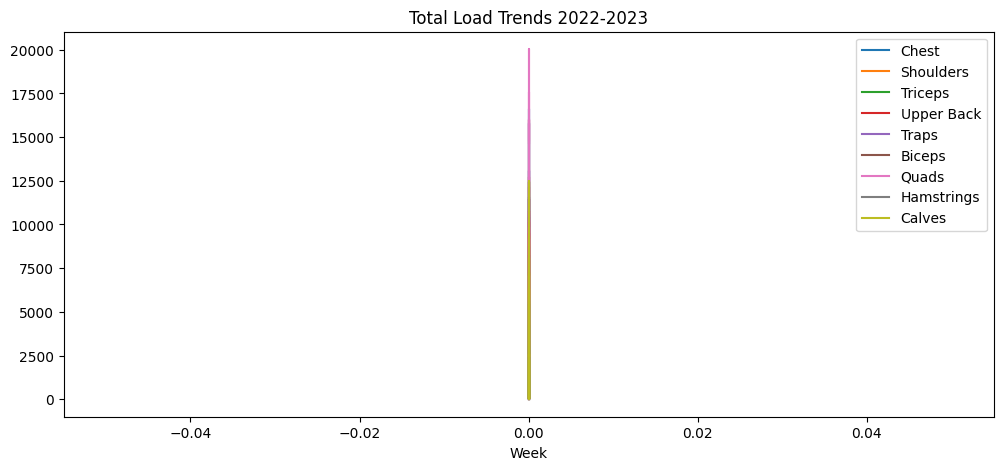

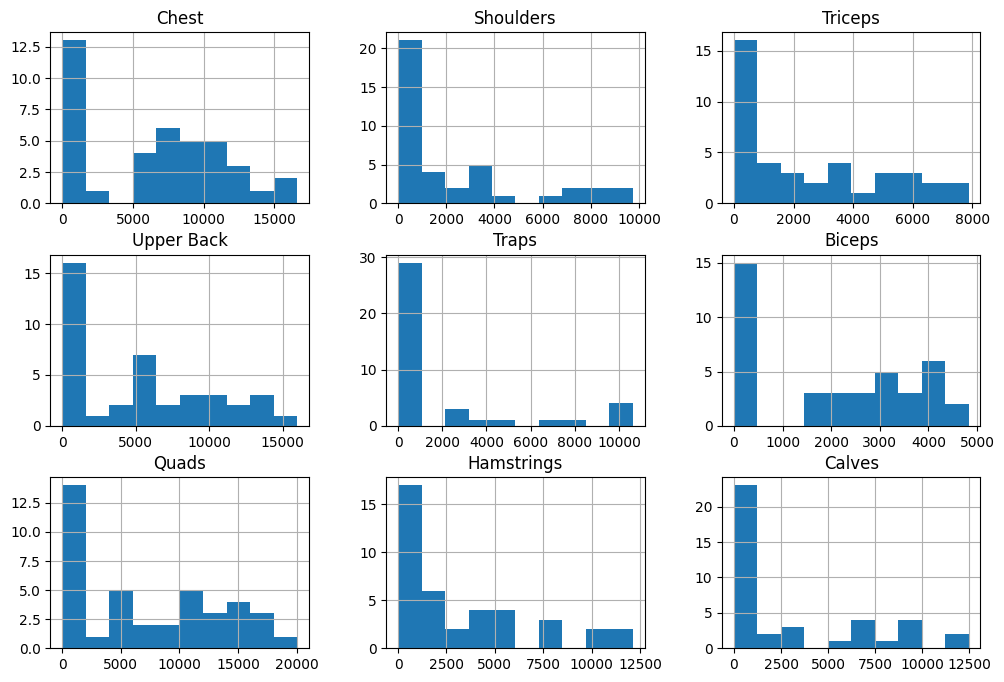

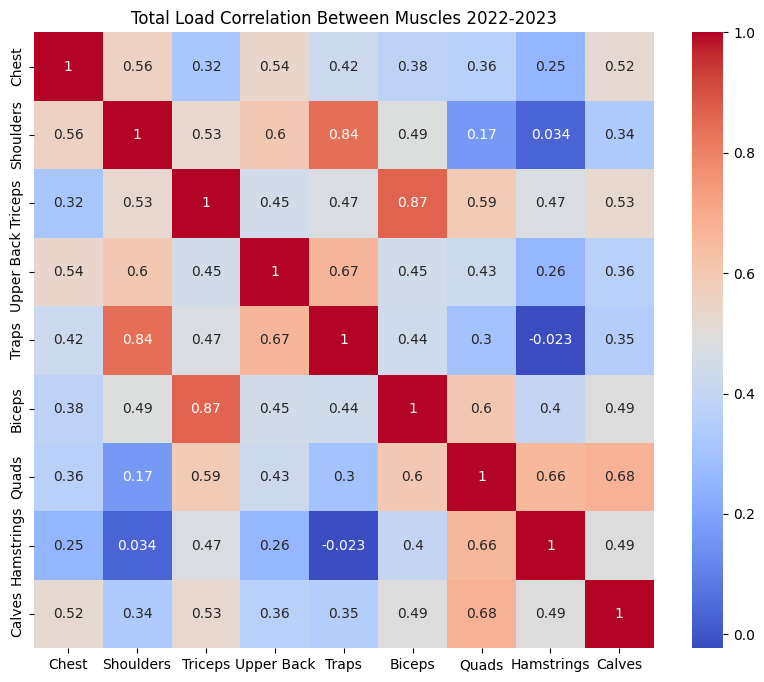

Highest correlation: ('Triceps', 'Biceps') = 0.87
Lowest correlation: ('Traps', 'Hamstrings') = -0.02

Metric: Total Sets
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Week           40 non-null     Int64  
 1   Chest          40 non-null     Int64  
 2   Shoulders      40 non-null     Int64  
 3   Triceps        40 non-null     Int64  
 4   Upper Back     40 non-null     Int64  
 5   Traps          40 non-null     Int64  
 6   Biceps         40 non-null     Int64  
 7   Quads          40 non-null     Int64  
 8   Hamstrings     40 non-null     Int64  
 9   Calves         40 non-null     Int64  
 10  Week_Number    40 non-null     float64
 11  Frame          40 non-null     int64  
 12  Week_in_Frame  40 non-null     int64  
dtypes: Int64(10), float64(1), int64(2)
memory usage: 4.6 KB
None
       Week     Chest  Shoulders   Triceps  Upper

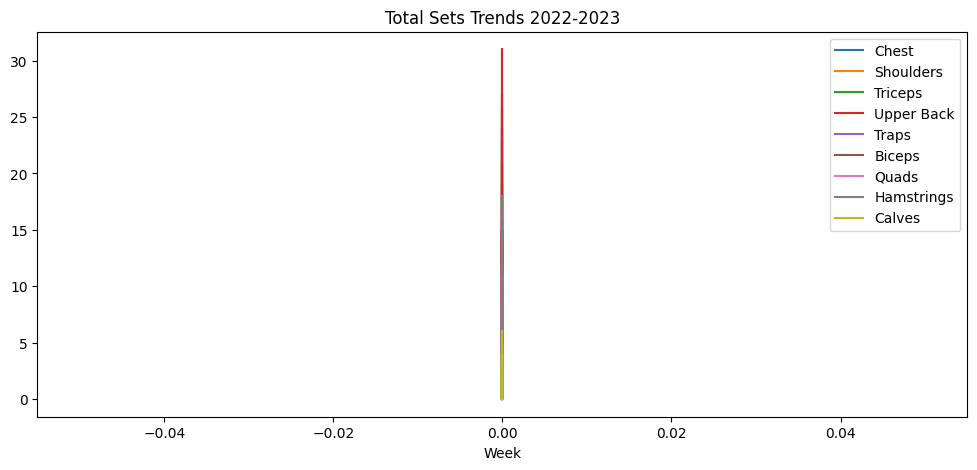

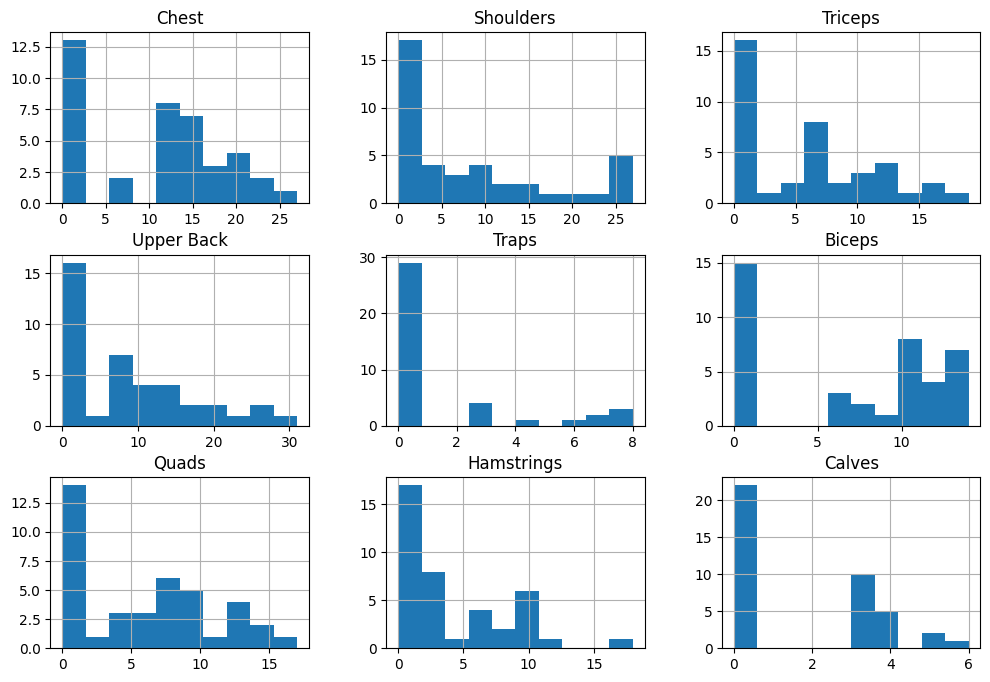

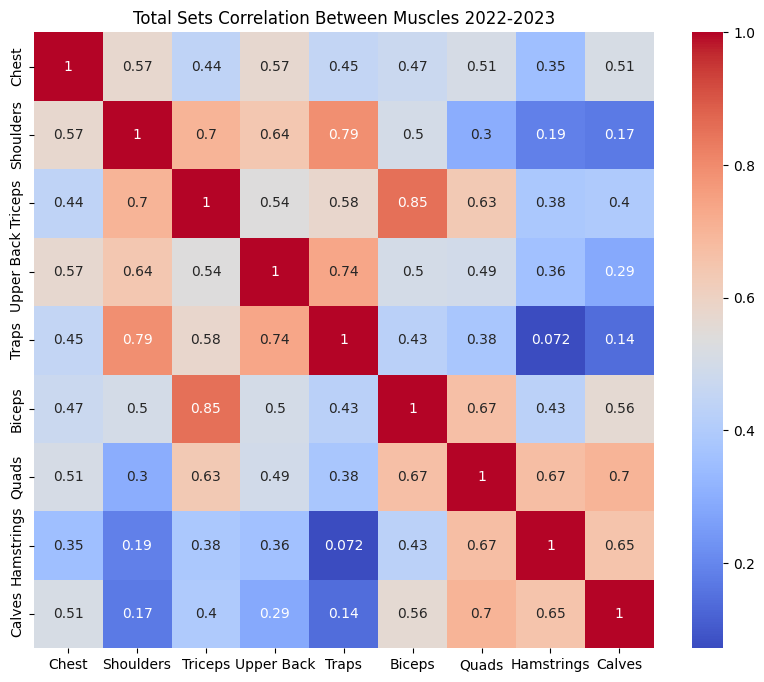

Highest correlation: ('Triceps', 'Biceps') = 0.85
Lowest correlation: ('Traps', 'Hamstrings') = 0.07

Metric: Total Reps
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Week           40 non-null     Int64  
 1   Chest          40 non-null     Int64  
 2   Shoulders      40 non-null     Int64  
 3   Triceps        40 non-null     Int64  
 4   Upper Back     40 non-null     Int64  
 5   Traps          40 non-null     Int64  
 6   Biceps         40 non-null     Int64  
 7   Quads          40 non-null     Int64  
 8   Hamstrings     40 non-null     Int64  
 9   Calves         40 non-null     Int64  
 10  Week_Number    40 non-null     float64
 11  Frame          40 non-null     int64  
 12  Week_in_Frame  40 non-null     int64  
dtypes: Int64(10), float64(1), int64(2)
memory usage: 4.6 KB
None
       Week      Chest   Shoulders    Triceps  Upp

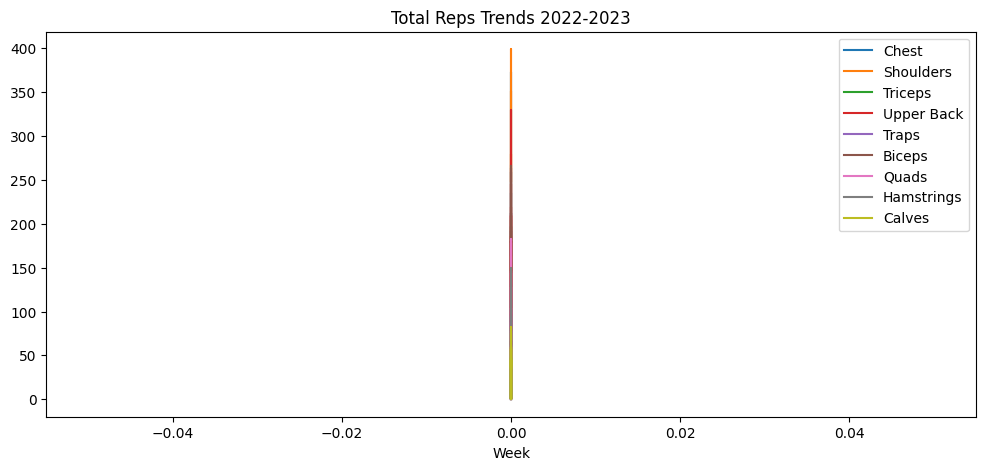

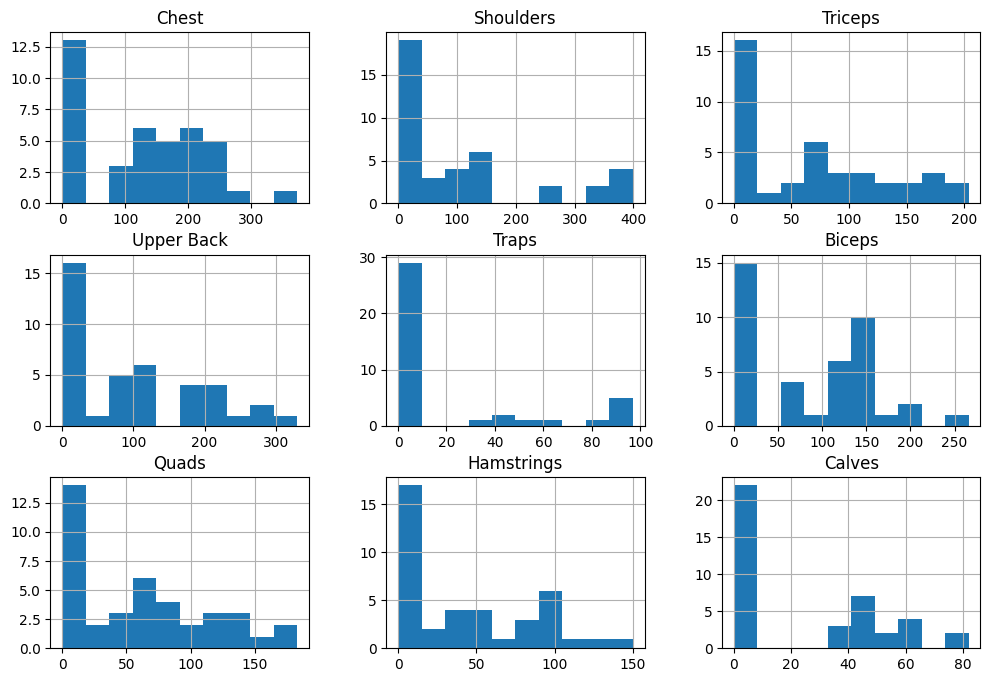

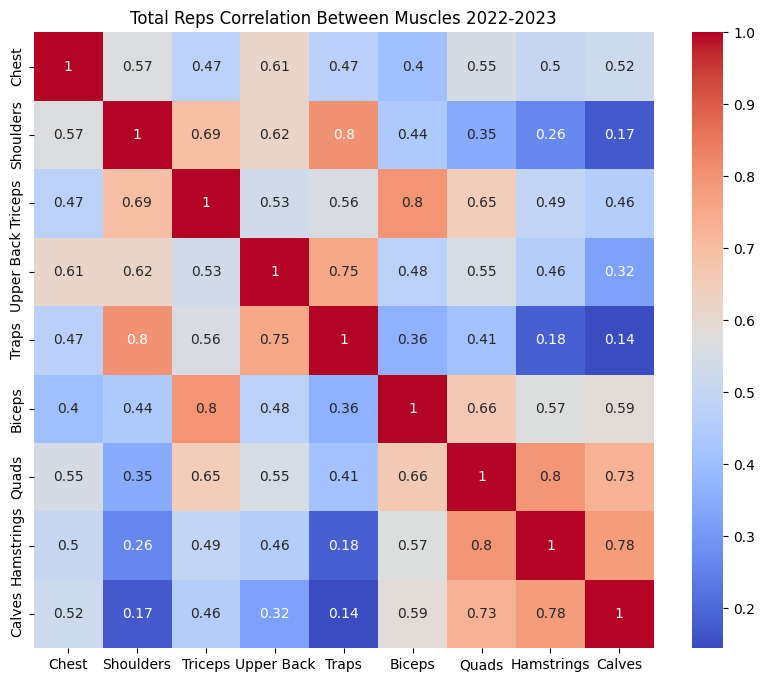

Highest correlation: ('Shoulders', 'Traps') = 0.80
Lowest correlation: ('Traps', 'Calves') = 0.14

Metric: Weights Per Rep
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Week           40 non-null     float64
 1   Chest          40 non-null     float64
 2   Shoulders      40 non-null     float64
 3   Triceps        40 non-null     float64
 4   Upper Back     40 non-null     float64
 5   Traps          40 non-null     float64
 6   Biceps         40 non-null     float64
 7   Quads          40 non-null     float64
 8   Hamstrings     40 non-null     float64
 9   Calves         40 non-null     float64
 10  Week_Number    40 non-null     float64
 11  Frame          40 non-null     int64  
 12  Week_in_Frame  40 non-null     int64  
dtypes: float64(11), int64(2)
memory usage: 4.2 KB
None
       Week      Chest  Shoulders    Triceps  Upper Back  

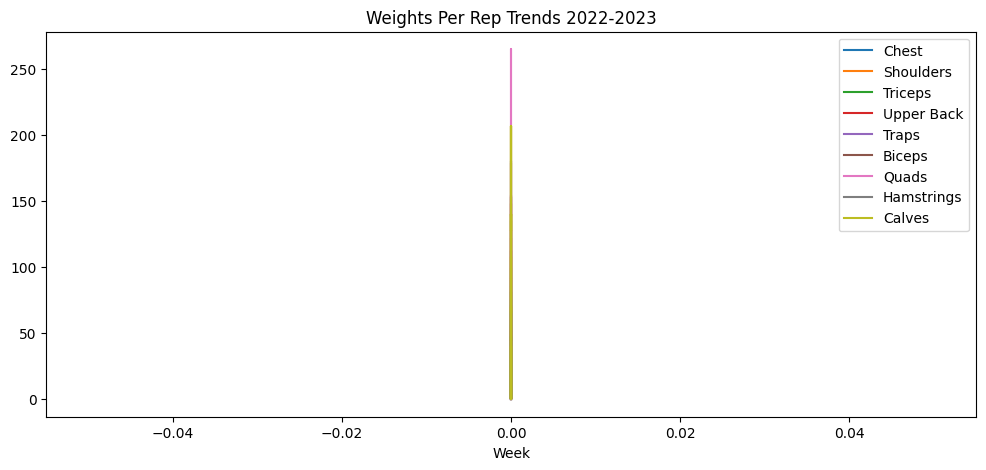

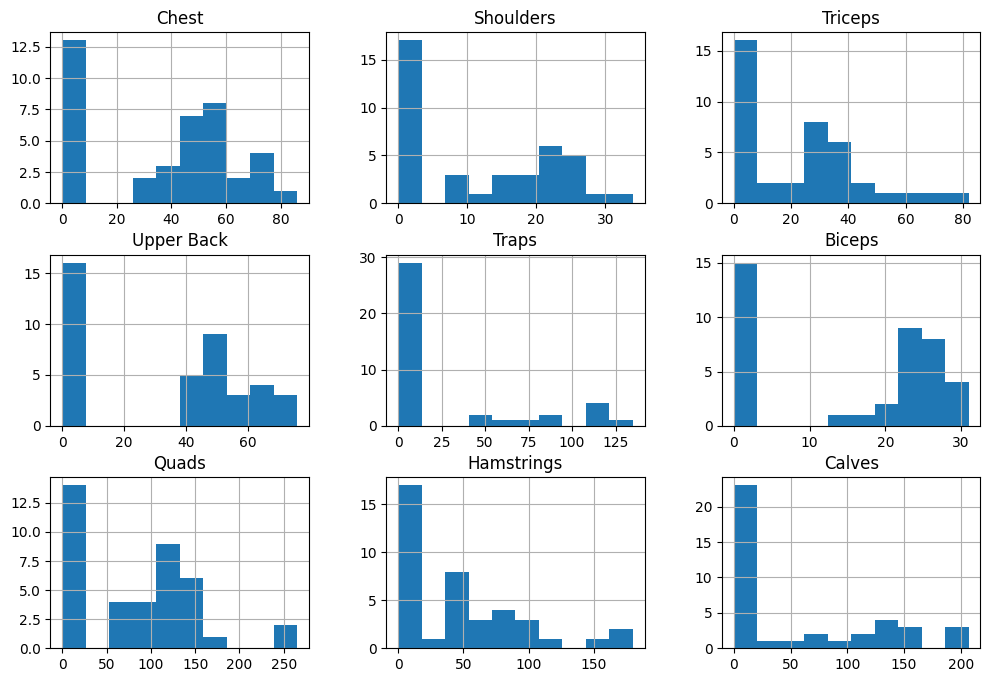

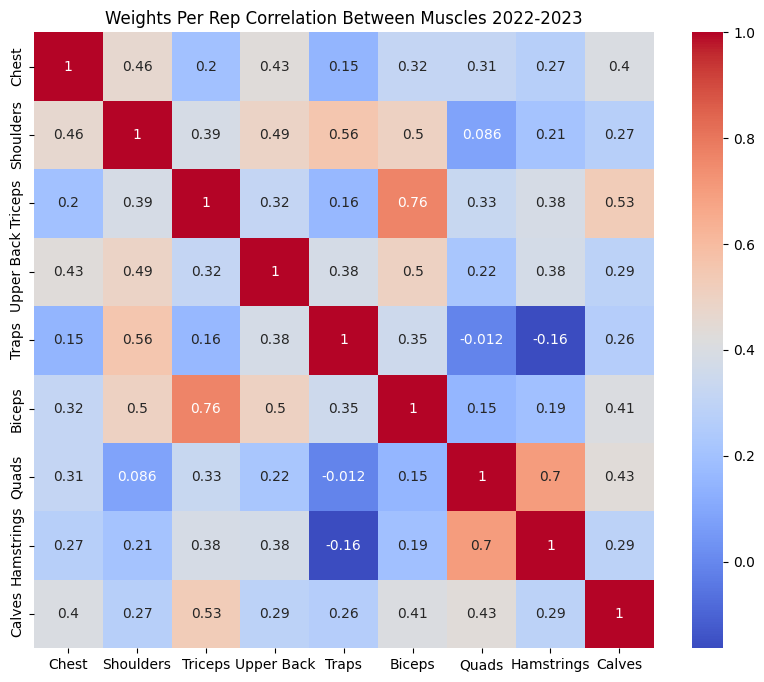

Highest correlation: ('Triceps', 'Biceps') = 0.76
Lowest correlation: ('Traps', 'Hamstrings') = -0.16



In [64]:
for metric, df in tables_2022_cleaned.items():
    print(f"Metric: {metric}")
    ignore_cols = ["Week", "Week_Number", "Frame", "Week_in_Frame"]
    muscle_cols = [c for c in df.columns if c not in ignore_cols]
    print(df.info())
    print(df.describe())
    print((df != 0).sum())
    #plot
    df.plot(x= "Week", y= muscle_cols, figsize=(12,5), title=f"{metric} Trends 2022-2023")
    #histogram
    df[muscle_cols].hist(figsize=(12,8))
    #heatmap
    corr_matrix = df[muscle_cols].corr()  # now only muscles
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
    plt.title(f"{metric} Correlation Between Muscles 2022-2023")
    plt.show()
    #shows my high/lows
    mask = np.eye(len(corr_matrix), dtype=bool)
    corr_values = corr_matrix.mask(mask)
    max_corr = corr_values.stack().idxmax()
    max_value = corr_values.stack().max()
    min_corr = corr_values.stack().idxmin()
    min_value = corr_values.stack().min()
    print(f"Highest correlation: {max_corr} = {max_value:.2f}")
    print(f"Lowest correlation: {min_corr} = {min_value:.2f}\n")
    plt.show()

- Most Frequently Trained Muscles:
  - Chest and Quads are the most frequented muscle group.
  - Traps and Calves tend to have the least hit muscle group
- High Load Spikes:
  - Week 0 has the highest spike due to it being the baseline and start of workout trends
- Muscle Balance:
  - Traps contiune to be the weakest growth area in terms of distrubption.
- Trends over time:
  -  There are bumps of growth as time continues to move forwards
- Potential ares of improvement:
  - See previous notes

# Organizing 2024-2025

## Verification

Metric: Total Load
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Week           52 non-null     Int64  
 1   Chest          52 non-null     Int64  
 2   Shoulder       52 non-null     Int64  
 3   Triceps        52 non-null     Int64  
 4   Upper Back     52 non-null     Int64  
 5   Traps          52 non-null     Int64  
 6   Bicep          52 non-null     Int64  
 7   Quads          52 non-null     Int64  
 8   Hamstrings     52 non-null     Int64  
 9   Calves         52 non-null     Int64  
 10  Week_Number    52 non-null     float64
 11  Frame          52 non-null     int64  
 12  Week_in_Frame  52 non-null     int64  
dtypes: Int64(10), float64(1), int64(2)
memory usage: 5.9 KB
None
       Week         Chest     Shoulder      Triceps    Upper Back  \
count  52.0          52.0         52.0         52.0          52.0   
mean    0.0  1

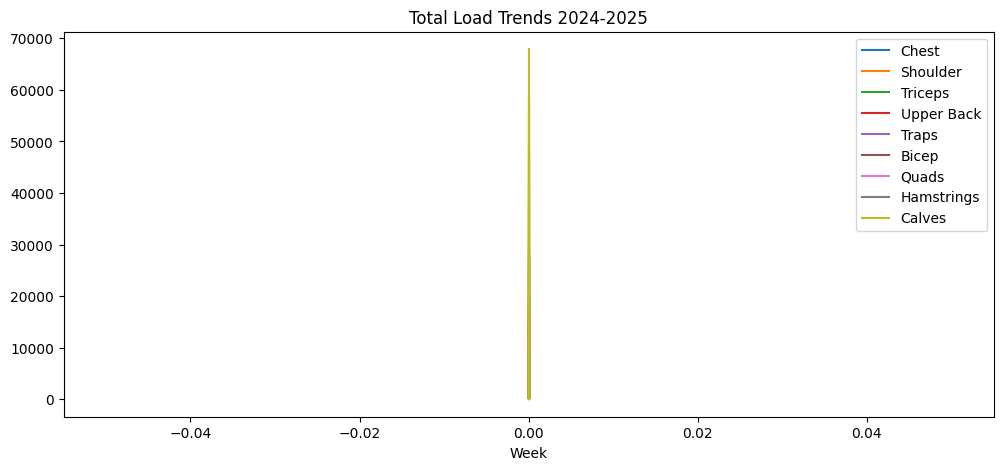

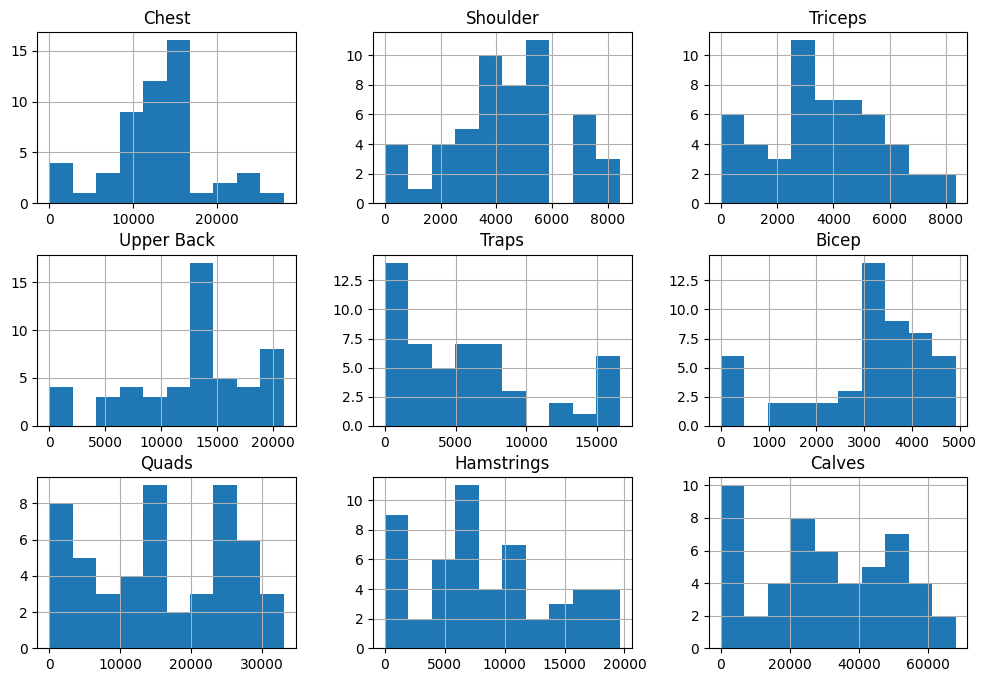

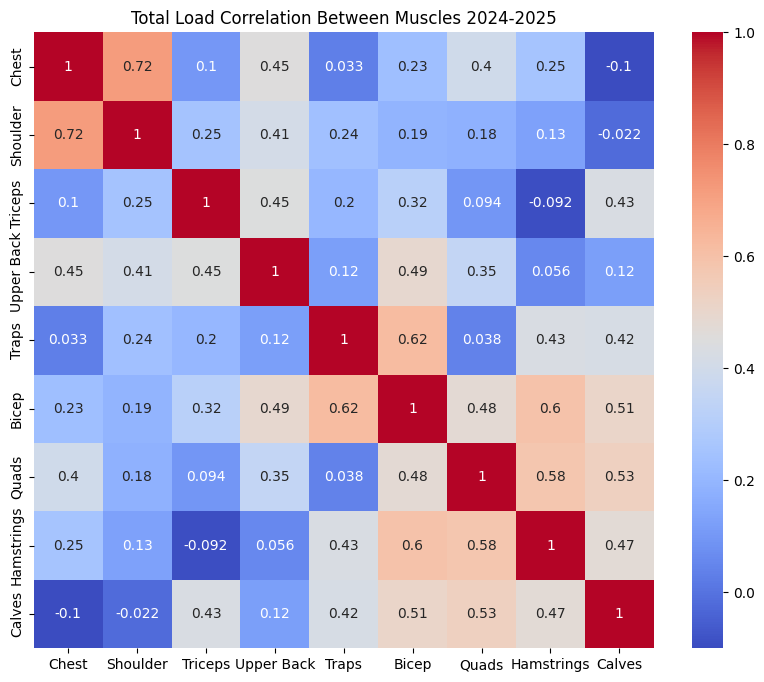

Highest correlation: ('Chest', 'Shoulder') = 0.72
Lowest correlation: ('Chest', 'Calves') = -0.10

Metric: Total Sets
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Week           52 non-null     Int64  
 1   Chest          52 non-null     Int64  
 2   Shoulder       52 non-null     Int64  
 3   Triceps        52 non-null     Int64  
 4   Upper Back     52 non-null     Int64  
 5   Traps          52 non-null     Int64  
 6   Bicep          52 non-null     Int64  
 7   Quads          52 non-null     Int64  
 8   Hamstrings     52 non-null     Int64  
 9   Calves         52 non-null     Int64  
 10  Week_Number    52 non-null     float64
 11  Frame          52 non-null     int64  
 12  Week_in_Frame  52 non-null     int64  
dtypes: Int64(10), float64(1), int64(2)
memory usage: 5.9 KB
None
       Week      Chest  Shoulder   Triceps  Upper Bac

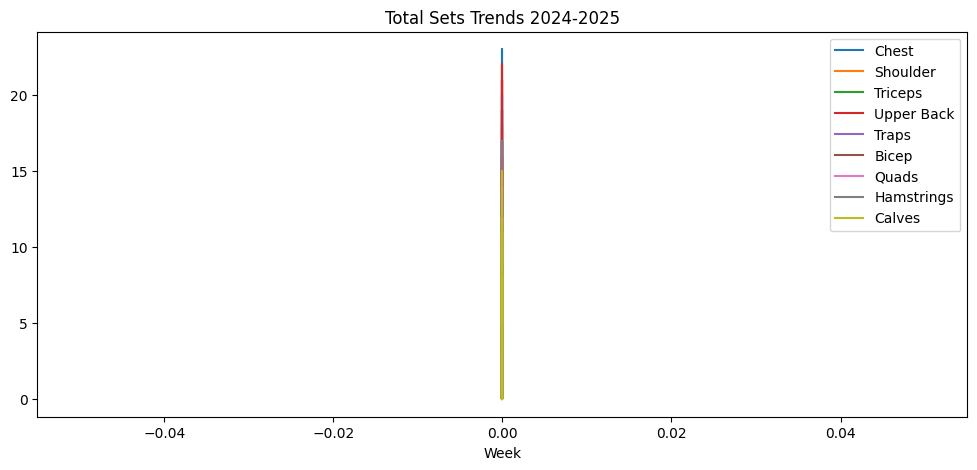

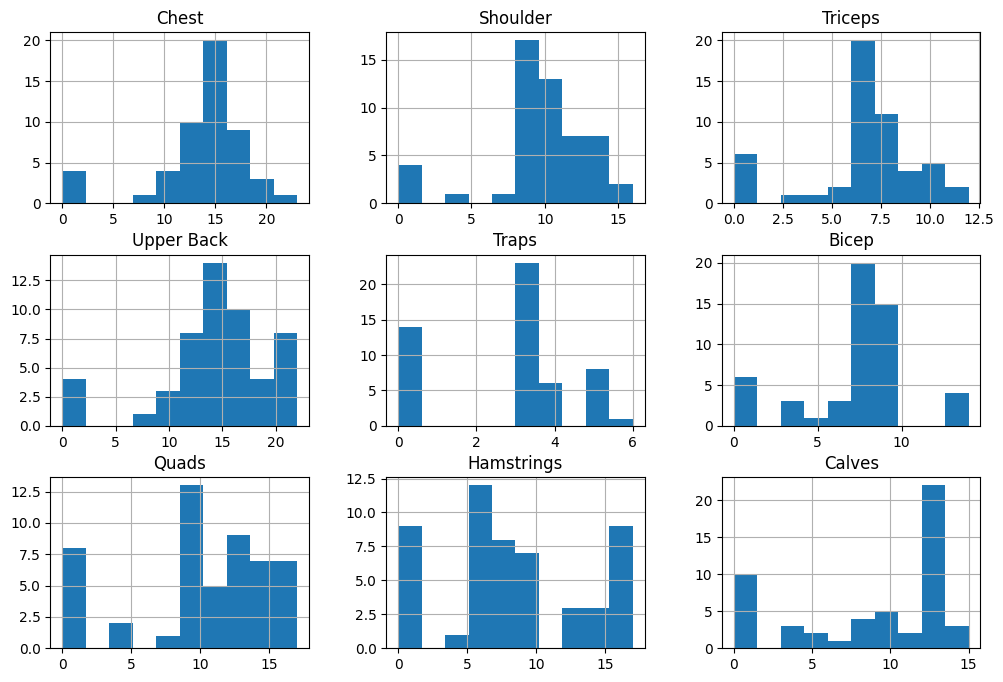

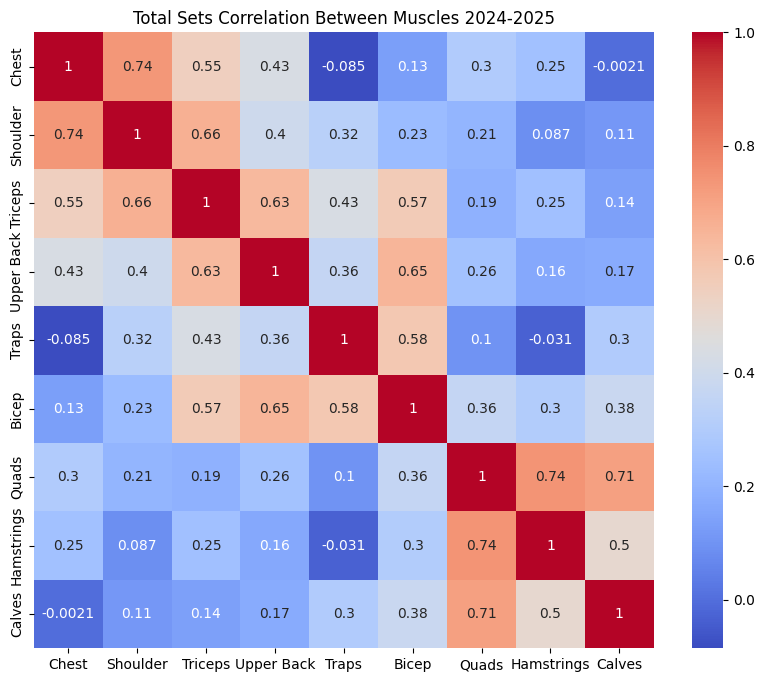

Highest correlation: ('Quads', 'Hamstrings') = 0.74
Lowest correlation: ('Chest', 'Traps') = -0.09

Metric: Total Reps
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Week           52 non-null     Int64  
 1   Chest          52 non-null     Int64  
 2   Shoulder       52 non-null     Int64  
 3   Triceps        52 non-null     Int64  
 4   Upper Back     52 non-null     Int64  
 5   Traps          52 non-null     Int64  
 6   Bicep          52 non-null     Int64  
 7   Quads          52 non-null     Int64  
 8   Hamstrings     52 non-null     Int64  
 9   Calves         52 non-null     Int64  
 10  Week_Number    52 non-null     float64
 11  Frame          52 non-null     int64  
 12  Week_in_Frame  52 non-null     int64  
dtypes: Int64(10), float64(1), int64(2)
memory usage: 5.9 KB
None
       Week       Chest   Shoulder    Triceps  Upper

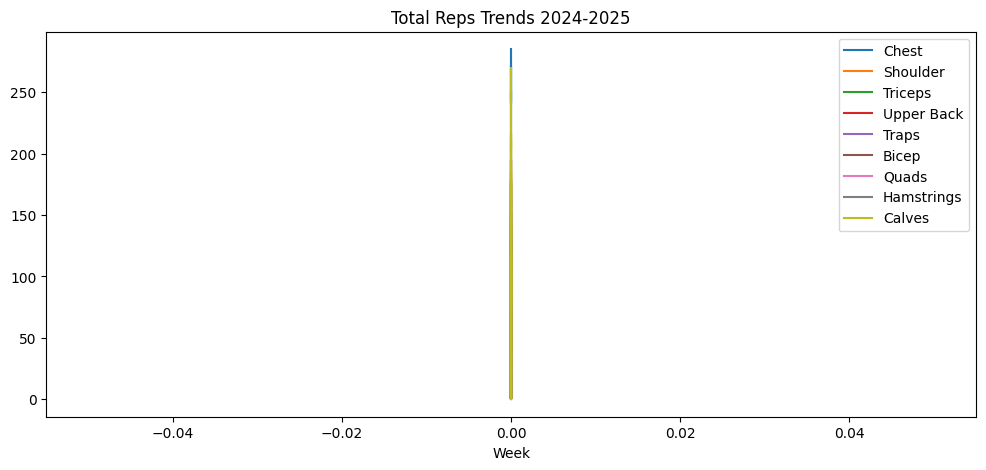

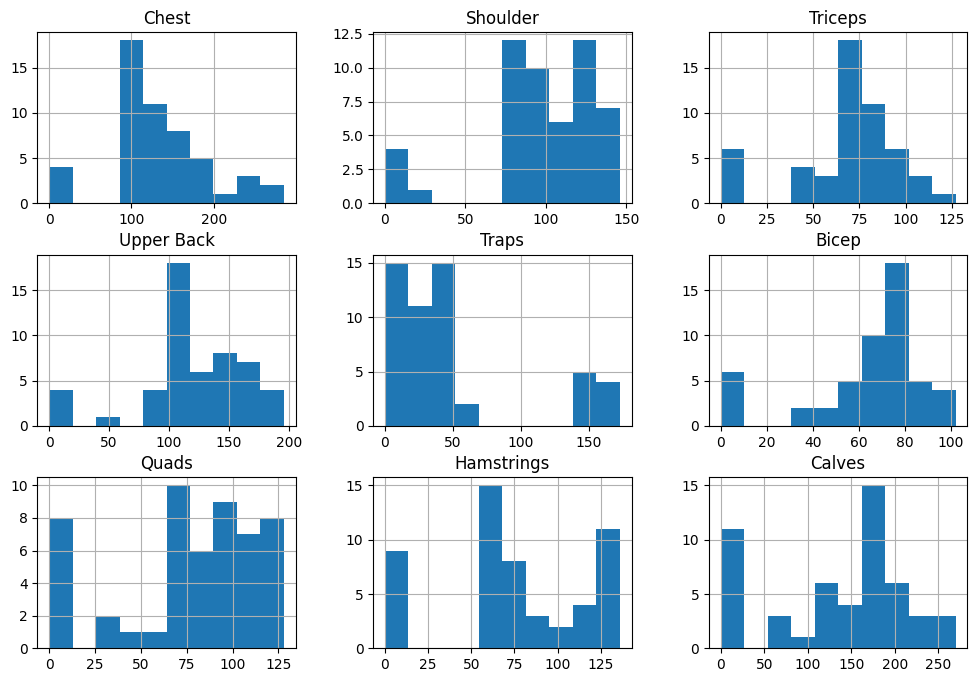

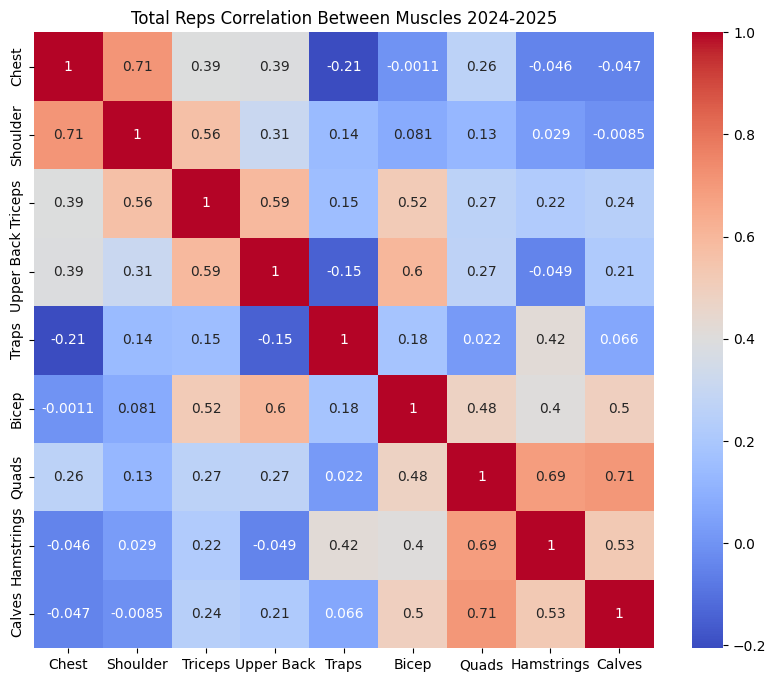

Highest correlation: ('Chest', 'Shoulder') = 0.71
Lowest correlation: ('Chest', 'Traps') = -0.21

Metric: Weights Per Rep
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Week           52 non-null     float64
 1   Chest          52 non-null     float64
 2   Shoulder       52 non-null     float64
 3   Triceps        52 non-null     float64
 4   Upper Back     52 non-null     float64
 5   Traps          52 non-null     float64
 6   Bicep          52 non-null     float64
 7   Quads          52 non-null     float64
 8   Hamstrings     52 non-null     float64
 9   Calves         52 non-null     float64
 10  Week_Number    52 non-null     float64
 11  Frame          52 non-null     int64  
 12  Week_in_Frame  52 non-null     int64  
dtypes: float64(11), int64(2)
memory usage: 5.4 KB
None
       Week       Chest   Shoulder    Triceps  Upper Back  

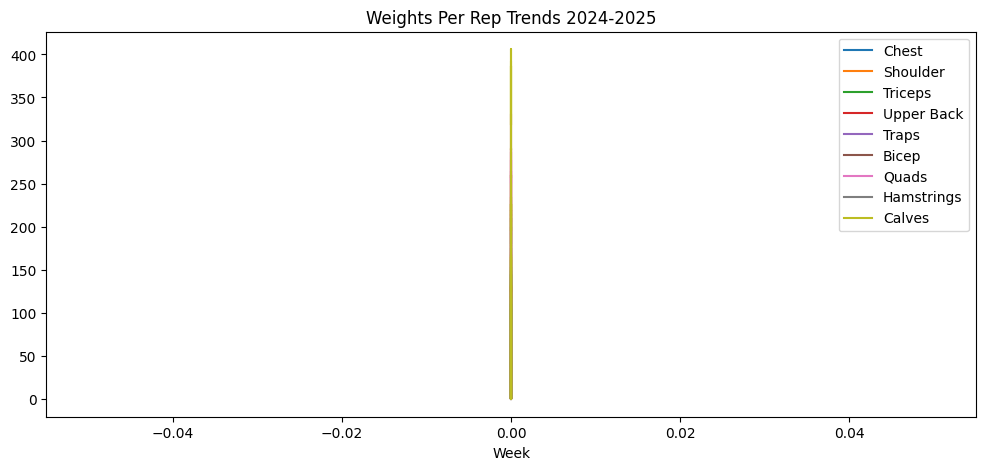

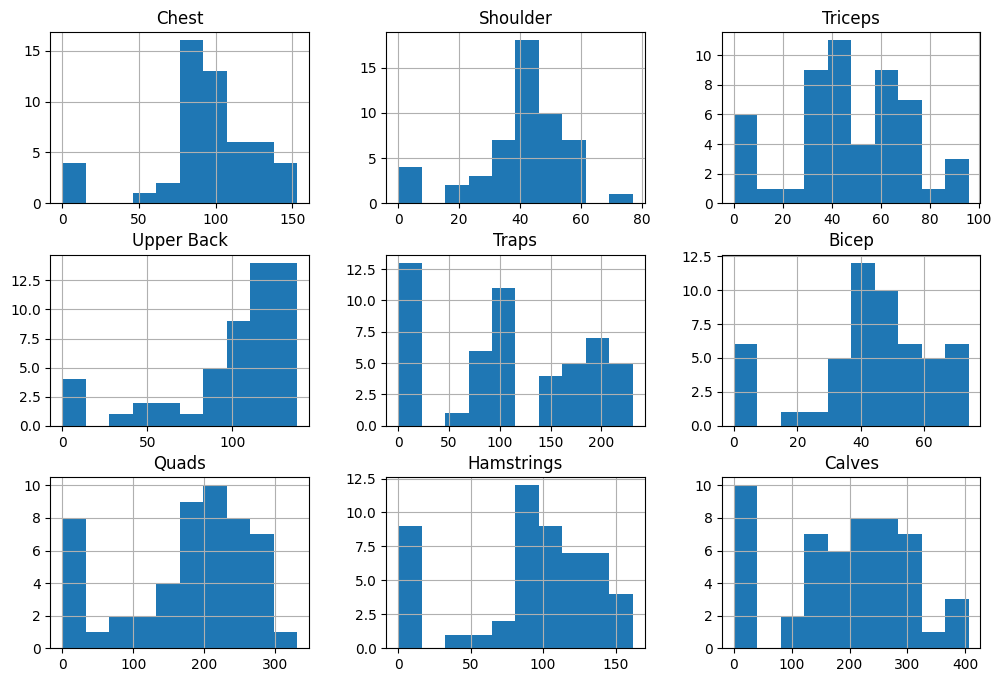

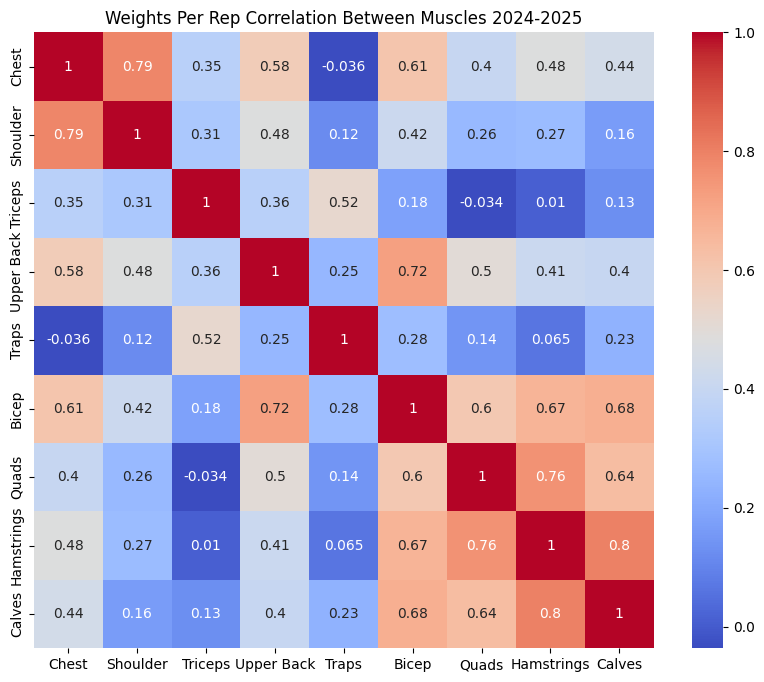

Highest correlation: ('Hamstrings', 'Calves') = 0.80
Lowest correlation: ('Chest', 'Traps') = -0.04



In [65]:
for metric, df in tables_2024_cleaned.items():
    print(f"Metric: {metric}")
    ignore_cols = ["Week", "Week_Number", "Frame", "Week_in_Frame"]
    muscle_cols = [c for c in df.columns if c not in ignore_cols]
    print(df.info())
    print(df.describe())
    print((df != 0).sum())
    #plot
    df.plot(x= "Week", y= muscle_cols, figsize=(12,5), title=f"{metric} Trends 2024-2025")
    #histogram
    df[muscle_cols].hist(figsize=(12,8))
    #heatmap
    corr_matrix = df[muscle_cols].corr()  # now only muscles
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
    plt.title(f"{metric} Correlation Between Muscles 2024-2025")
    plt.show()
    #shows my high/lows
    mask = np.eye(len(corr_matrix), dtype=bool)
    corr_values = corr_matrix.mask(mask)
    max_corr = corr_values.stack().idxmax()
    max_value = corr_values.stack().max()
    min_corr = corr_values.stack().idxmin()
    min_value = corr_values.stack().min()
    print(f"Highest correlation: {max_corr} = {max_value:.2f}")
    print(f"Lowest correlation: {min_corr} = {min_value:.2f}\n")
    plt.show()

# 2022-2023 | 2024-2025 Merge

## Merging Tables

In [66]:
the_merged = {metric: pd.concat([tables_2022_cleaned[metric], tables_2024_cleaned[metric]], ignore_index=True)
                 for metric in metrics}

## Cleaning/Verficiation

In [67]:
for metric, df in the_merged.items():
    print(f"=== {metric} Merged ===")
    print(df.info())
    print(df.describe())
    print("Non-zero counts per muscle:")
    print((df.iloc[:, 1:] != 0).sum())

=== Total Load Merged ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Week           92 non-null     Int64  
 1   Chest          92 non-null     Int64  
 2   Shoulders      40 non-null     Int64  
 3   Triceps        92 non-null     Int64  
 4   Upper Back     92 non-null     Int64  
 5   Traps          92 non-null     Int64  
 6   Biceps         40 non-null     Int64  
 7   Quads          92 non-null     Int64  
 8   Hamstrings     92 non-null     Int64  
 9   Calves         92 non-null     Int64  
 10  Week_Number    92 non-null     float64
 11  Frame          92 non-null     int64  
 12  Week_in_Frame  92 non-null     int64  
 13  Shoulder       52 non-null     Int64  
 14  Bicep          52 non-null     Int64  
dtypes: Int64(12), float64(1), int64(2)
memory usage: 12.0 KB
None
       Week         Chest    Shoulders      Triceps   Up

## EDA

Metric: Total Load
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Week           92 non-null     Int64  
 1   Chest          92 non-null     Int64  
 2   Shoulders      40 non-null     Int64  
 3   Triceps        92 non-null     Int64  
 4   Upper Back     92 non-null     Int64  
 5   Traps          92 non-null     Int64  
 6   Biceps         40 non-null     Int64  
 7   Quads          92 non-null     Int64  
 8   Hamstrings     92 non-null     Int64  
 9   Calves         92 non-null     Int64  
 10  Week_Number    92 non-null     float64
 11  Frame          92 non-null     int64  
 12  Week_in_Frame  92 non-null     int64  
 13  Shoulder       52 non-null     Int64  
 14  Bicep          52 non-null     Int64  
dtypes: Int64(12), float64(1), int64(2)
memory usage: 12.0 KB
None
       Week         Chest    Shoulders      Triceps   Upper Bac

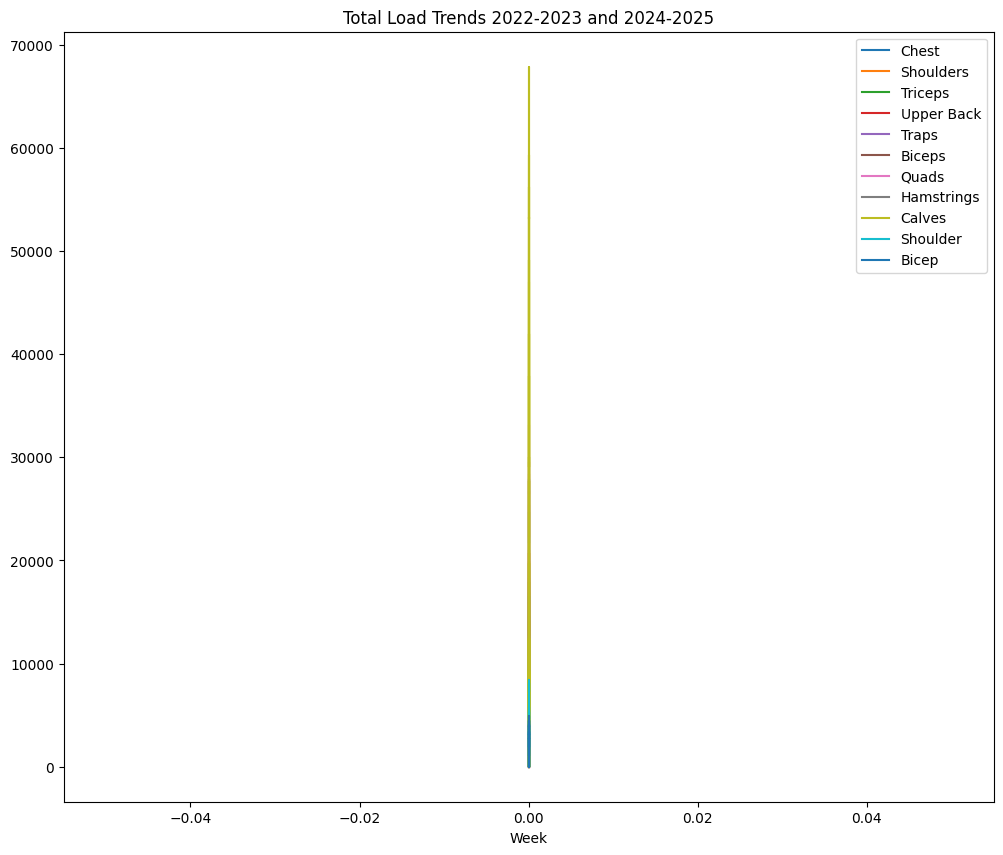

In [ ]:
for metric, df in the_merged.items():
    print(f"Metric: {metric}")
    ignore_cols = ["Week", "Week_Number", "Frame", "Week_in_Frame"]
    muscle_cols = [c for c in df.columns if c not in ignore_cols]
    print(df.info())
    print(df.describe())
    print((df != 0).sum())
    #plot
    df.plot(x= "Week", y= muscle_cols, figsize=(12,10), title=f"{metric} Trends 2022-2023 and 2024-2025")
    #histogram
    df[muscle_cols].hist(figsize=(12,12))
    #heatmap
    corr_matrix = df[muscle_cols].corr()  # now only muscles
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
    plt.title(f"{metric} Correlation Between Muscles 2022-2023 and 2024-2025")
    plt.show()
    #shows my high/lows
    mask = np.eye(len(corr_matrix), dtype=bool)
    corr_values = corr_matrix.mask(mask)
    max_corr = corr_values.stack().idxmax()
    max_value = corr_values.stack().max()
    min_corr = corr_values.stack().idxmin()
    min_value = corr_values.stack().min()
    print(f"Highest correlation: {max_corr} = {max_value:.2f}")
    print(f"Lowest correlation: {min_corr} = {min_value:.2f}\n")
    plt.show()